### Part 1

Telecommunications:
1. Binomial -The occurence of network error or fault happening given a call taking place in an area with less network      coverage i.e probabbility of a call facing no interruption due to network faults.
    
2. Poisson -The number of customers churning out over the period of time. Poisson distribution can be used to monitor   the number of people churning out of the telecommunication service and take action according if the average                     rate increases over time they may take some action to investigate.
                 
3. Exponential - The impact of a certain marketing activity on the company's profit over a specified period of time
in te first few months it would be more but the impact in terms of monetery return would reduce

Banking: 
1. Binomial -  In a given group of people probability of a person being credit worthy or not
    
2. Poisson -  The probability of a new customer being a potential investor given the persona of an investor
    
Retail/Supply Chain:

Exponential - The area on which the marketing activity is impactful is that as you move away from the source area of the         marketing activity the impact of that activity on the ROI reduces.

Healthcare:
1. Binomial - Dignosing a patient diabetic or not diabetic over different groups of people
    
2. Poisson - The number of corona cases registering on a given day at each hour
    
3. Exponential - The length of time  it takes a virus population to diminish

Insurance: 
1. Poisson - The probability of a catastrophic event occuring over a period of time for insurance claim can be modelled         using this distribution.
    




### Part 2: 
    In the datetime analysis file (uploaded on drive), try to find out the reason as to why there is an
    average 10 hour time between giving of orders and approving them. You need to create your own notebook and
    execute your own method of analysis
    with explanations.

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline

## Analysis is written in the end for part 2
## Methodology
1. First outliers were identified using the interquartile range formulae
2. Second the analysis was done by remving the outliers
3. Thirdly K Means Clustering was done to segment the times of difference between the order and approval


In [147]:
import pandas as pd
#read the Orders CSV file
ordersdf = pd.read_csv("Orders.Data.csv")

#print out the basic info
print(ordersdf.shape)
print(ordersdf.dtypes)

(99441, 8)
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


In [148]:
#there are different dates regarding the ordering and delivery of a product
#what if I want to find out the average timespan between order and delivery?
ordersdf.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [149]:
#all dates are objects so we have to convert them to datetime objects
#lets change the column names first
ordersdf = ordersdf.rename(columns = {"order_purchase_timestamp": "Purchased_At",
                         "order_approved_at":"Approved_At",
                         "order_delivered_carrier_date": "Delivered_to_Carrier_On",
                         "order_delivered_customer_date": "Delivered_to_Customer_On",
                         "order_estimated_delivery_date": "Estimated_Delivery_On"}) 
ordersdf.head(10)


,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [150]:
#lets typecast to datetime
ordersdf['Purchased_At'] = pd.to_datetime(ordersdf['Purchased_At'])
ordersdf['Approved_At'] = pd.to_datetime(ordersdf['Approved_At'])
ordersdf['Delivered_to_Carrier_On'] = pd.to_datetime(ordersdf['Delivered_to_Carrier_On'])
ordersdf['Delivered_to_Customer_On'] = pd.to_datetime(ordersdf['Delivered_to_Customer_On'])
ordersdf['Estimated_Delivery_On'] = pd.to_datetime(ordersdf['Estimated_Delivery_On'])
ordersdf.dtypes

order_id                            object
customer_id                         object
order_status                        object
Purchased_At                datetime64[ns]
Approved_At                 datetime64[ns]
Delivered_to_Carrier_On     datetime64[ns]
Delivered_to_Customer_On    datetime64[ns]
Estimated_Delivery_On       datetime64[ns]
dtype: object

In [151]:
#what is the average difference between order time and approval time
ordersdf['between_order_approval'] = ordersdf['Approved_At'] - ordersdf['Purchased_At']

In [152]:
ordersdf['between_order_approval'].describe()

count                        99281
mean     0 days 10:25:08.739486910
std      1 days 02:02:16.813098347
min                0 days 00:00:00
25%                0 days 00:12:54
50%                0 days 00:20:36
75%                0 days 14:34:51
max              187 days 21:10:50
Name: between_order_approval, dtype: object

In [153]:
ordersdf['Time']=between_order_approval.apply(lambda x: (x.total_seconds())/3600)

#whoa... 10 hours is the average time between order and approval.. this seems a bit too much
#we will dig this later

In [154]:
ordersdf['Time'].mean()

10.419094301919714

In [156]:
ordersdf['Time']

0         0.178333
1        30.713889
2         0.276111
3         0.298056
4         1.030556
           ...    
99436     0.000000
99437     0.194167
99438     0.292500
99439     0.131667
99440    14.382778
Name: Time, Length: 99441, dtype: float64

In [157]:
ordersdf['Time'].describe()

count    99281.000000
mean        10.419094
std         26.038004
min          0.000000
25%          0.215000
50%          0.343333
75%         14.580833
max       4509.180556
Name: Time, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Count'>

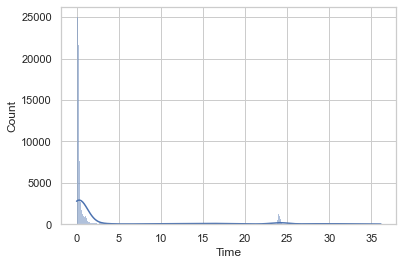

In [158]:
import seaborn as sns
sns.histplot(data=ordersdf, x=x, kde=True)

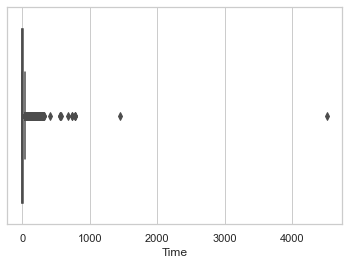

In [165]:
x=ordersdf['Time']
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.boxplot(x=ordersdf['Time'])

In [166]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

14.365833333333333


In [167]:
out_liers= x [(x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))]

In [168]:
rows = out_liers.index



In [169]:
x.drop(rows, inplace=True)

In [170]:
x

0         0.178333
1        30.713889
2         0.276111
3         0.298056
4         1.030556
           ...    
99436     0.000000
99437     0.194167
99438     0.292500
99439     0.131667
99440    14.382778
Name: Time, Length: 90300, dtype: float64

In [171]:
x.shape

(90300,)

In [59]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(x))
print(z)

[nan nan nan ... nan nan nan]


<AxesSubplot:xlabel='Time', ylabel='Count'>

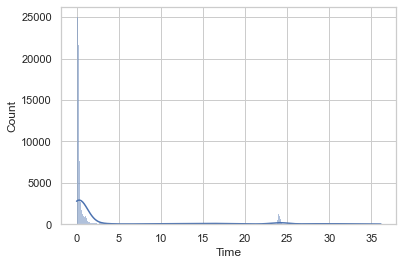

In [175]:
import seaborn as sns
sns.histplot(data=ordersdf, x=x, kde=True)

In [176]:
x.mean()

5.204837105243709

In [177]:
### After the removal of outliers the mean approval time is 5 hours

In [178]:
#### Quartile Analysis

In [179]:
Q1 = x.quantile(0.25)
Q1

0.20833333333333334

In [180]:
Q1= x [(x < Q1) ]

In [181]:
Q1.mean()*60

9.667897967353005

In [182]:
### ( 9 minutes is the average of the first quartile 25 percecent of the orders on average approval takes 9 minutes)

In [183]:
Q1=Q1*60

In [184]:
Q1.mean()

9.667897967353088

In [185]:
Q1

0        10.700000
7        11.683333
9        10.500000
10        9.133333
11       11.950000
           ...    
99433     9.616667
99435     9.983333
99436     0.000000
99437    11.650000
99439     7.900000
Name: Time, Length: 22483, dtype: float64

<AxesSubplot:xlabel='Time', ylabel='Count'>

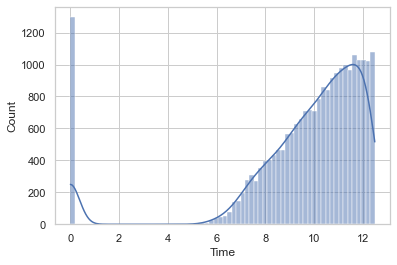

In [186]:
import seaborn as sns
sns.histplot(data=ordersdf, x=Q1, kde=True)

In [187]:
#### 25 percent under 12 minutes are approved

In [188]:
#### Now we looking at 50 percent of the data

In [189]:
Q2 = x.quantile(0.5)
Q2

0.3047222222222222

In [190]:
Q2= x [(x < Q2) ]

In [191]:
Q2=Q2*60

In [192]:
### ( 12 minutes is the average of the 50 percecent of the orders on average approval takes 12 minutes)

In [193]:
Q2.mean()

12.304367193512155

<AxesSubplot:xlabel='Time', ylabel='Count'>

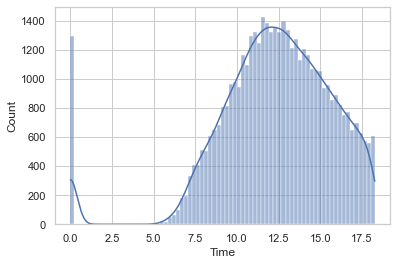

In [194]:
import seaborn as sns
sns.histplot(data=ordersdf, x=Q2, kde=True)

In [195]:
#### 50 percent under 18 minutes are approved

21.656809900648614


<AxesSubplot:xlabel='Time', ylabel='Count'>

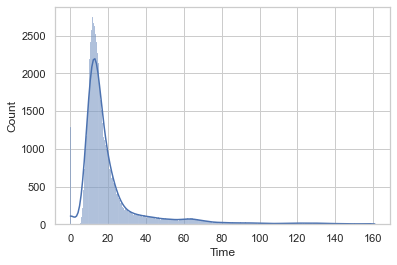

In [196]:
Q3 = x.quantile(0.75)
Q3= x [(x < Q3) ] *60
print(Q3.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=Q3, kde=True)


In [197]:
We can observe there are some values that is like 25 percent of order are taking more than an hour even aftaer other outliers are
removed

SyntaxError: invalid syntax (<ipython-input-197-809ecefec787>, line 1)

46.15974294615763


<AxesSubplot:xlabel='Time', ylabel='Count'>

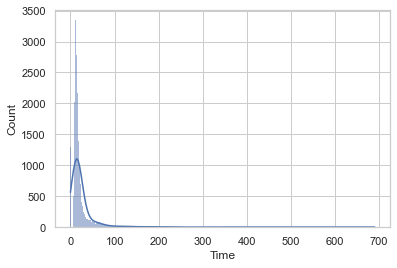

In [198]:
Q4 = x.quantile(0.8)
Q4= x [(x < Q4) ] *60
print(Q4.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=Q4, kde=True)

94.12533335943684


<AxesSubplot:xlabel='Time', ylabel='Count'>

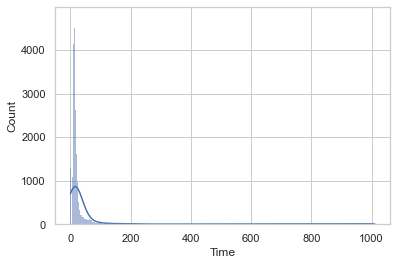

In [199]:
Q5 = x.quantile(0.85)
Q5= x [(x < Q5) ] *60
print(Q5.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=Q5, kde=True)

156.95635762977153


<AxesSubplot:xlabel='Time', ylabel='Count'>

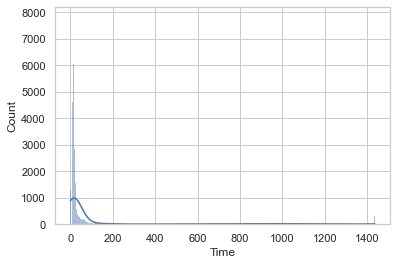

In [200]:
Q6 = x.quantile(0.90)
Q6= x [(x < Q6) ] *60
print(Q6.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=Q6, kde=True)

227.54962903709452


<AxesSubplot:xlabel='Time', ylabel='Count'>

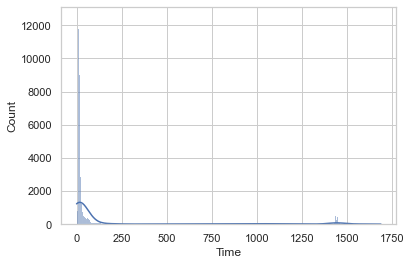

In [201]:
Q7 = x.quantile(0.95)
Q7= x [(x < Q7) ] *60
print(Q7.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=Q7, kde=True)

5.204837105243709


<AxesSubplot:xlabel='Time', ylabel='Count'>

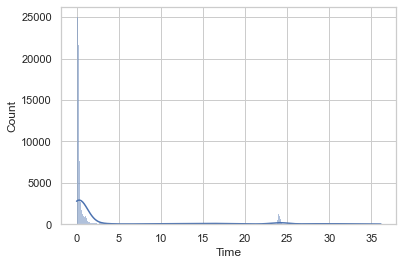

In [202]:
print(x.mean())
import seaborn as sns
sns.histplot(data=ordersdf, x=x, kde=True)

In [203]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

2.4725694444444444


In [204]:
out_liers1= x [(x < (Q1 - 1.5 * IQR)) |(x > (Q3 + 1.5 * IQR))]
rows = out_liers1.index
y=x.drop(rows).copy()

In [205]:
y.shape

(69780,)

28.10725342334574


<AxesSubplot:xlabel='Time', ylabel='Count'>

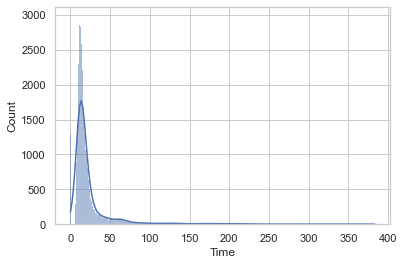

In [129]:
print(y.mean()*60)
import seaborn as sns
sns.histplot(data=ordersdf, x=y*60, kde=True)

In [ ]:

#so these all can be considered as sort of outliers.. but the way the orders are being processed needs to be drilled down
#i guess this has to do with different products. 

In [219]:
ordersdf.loc[out_liers1.index]

,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On,between_order_approval,Time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1 days 06:42:50,30.713889
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1 days 08:21:38,32.360556
20,203096f03d82e0dffbc41ebc2e2bcfb7,d2b091571da224a1b36412c18bc3bbfe,delivered,2017-09-18 14:31:30,2017-09-19 04:04:09,2017-10-06 17:50:03,2017-10-09 22:23:46,2017-09-28,0 days 13:32:39,13.544167
24,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,0 days 15:40:11,15.669722
25,fbf9ac61453ac646ce8ad9783d7d0af6,3a874b4d4c4b6543206ff5d89287f0c3,delivered,2018-02-20 23:46:53,2018-02-22 02:30:46,2018-02-26 22:25:22,2018-03-21 22:03:54,2018-03-12,1 days 02:43:53,26.731389
...,...,...,...,...,...,...,...,...,...,...
99410,71c4b7b8844a031b7db8ca41c41d4aae,dce0014426964924f9564758e4fadcbf,delivered,2017-09-03 20:52:34,2017-09-05 04:10:34,2017-09-05 17:47:58,2017-09-14 15:49:47,2017-10-03,1 days 07:18:00,31.300000
99411,4a69678ecf74bfd34260031c04329b68,eb19f77ffd29917f353d12152b0c0de1,delivered,2018-07-22 16:58:38,2018-07-23 12:32:05,2018-07-23 15:12:00,2018-07-24 22:46:38,2018-07-31,0 days 19:33:27,19.557500
99420,f9e3402be5a5ea63344347582ca9f45f,6f2cf56878f7f82151b0ad02590192c0,delivered,2017-06-07 11:02:37,2017-06-08 02:45:24,2017-06-08 14:03:29,2017-06-19 19:19:30,2017-07-05,0 days 15:42:47,15.713056
99423,38e9133ce29f6bbe35aed9c3863dce01,ad312389a098ceff46ce92c4595c06d0,delivered,2017-10-12 20:54:11,2017-10-14 03:28:24,2017-10-17 17:04:42,2017-11-21 17:06:59,2017-10-31,1 days 06:34:13,30.570278


In [208]:
fso=ordersdf.loc[out_liers.index]

In [220]:
fso

,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On,between_order_approval,Time
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2 days 01:03:09,49.052500
12,82566a660a982b15fb86e904c8d32918,d3e3b74c766bc6214e0c830b17ee2341,delivered,2018-06-07 10:06:19,2018-06-09 03:13:12,2018-06-11 13:29:00,2018-06-19 12:05:52,2018-07-18,1 days 17:06:53,41.114722
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,5 days 04:27:50,124.463889
30,f70a0aff17df5a6cdd9a7196128bd354,456dc10730fbdba34615447ea195d643,delivered,2017-08-10 11:58:33,2017-08-12 02:45:24,2017-08-17 15:35:07,2017-08-18 14:28:02,2017-08-23,1 days 14:46:51,38.780833
32,989225ba6d0ebd5873335f7e01de2ae7,816f8653d5361cbf94e58c33f2502a5c,delivered,2017-12-12 13:56:04,2017-12-14 13:54:13,2017-12-16 00:18:57,2018-01-03 18:03:36,2018-01-08,1 days 23:58:09,47.969167
...,...,...,...,...,...,...,...,...,...,...
99388,c0524fb1b4c905d054adbddaffa2380c,92e8f9754238b9697d9dcbe02c20fc70,delivered,2017-11-24 16:44:08,2017-11-28 03:39:41,2017-12-01 17:29:06,2017-12-11 18:09:24,2017-12-22,3 days 10:55:33,82.925833
99391,e8455c3c0bc5471436a335a0de392761,3a4562b466aea32a6aa09fe85e67d400,delivered,2018-02-13 10:42:15,2018-02-15 03:47:45,2018-02-21 20:33:20,2018-03-02 00:28:57,2018-03-09,1 days 17:05:30,41.091667
99392,33baefa752f2d98a008d4330d306d3db,8b764335e86e1a8f8d3db9f119e03a79,delivered,2017-04-23 14:47:39,2017-04-25 08:11:27,2017-04-25 13:24:03,2017-05-05 13:26:31,2017-05-15,1 days 17:23:48,41.396667
99406,7fd85cb0143de098a4c5ab5a57bfbd91,d32034dfc685b1ae15dd4c78eace868e,delivered,2017-05-04 21:05:28,2017-05-09 22:33:28,2017-05-09 17:02:58,2017-05-18 06:34:38,2017-06-01,5 days 01:28:00,121.466667


In [210]:
fso.nunique()

order_id                    9141
customer_id                 9141
order_status                   7
Purchased_At                9121
Approved_At                 8299
Delivered_to_Carrier_On     8574
Delivered_to_Customer_On    8830
Estimated_Delivery_On        424
between_order_approval      8835
Time                        8835
dtype: int64

In [211]:
fso['order_status'].value_counts()

delivered      8834
shipped         112
unavailable      93
canceled         46
processing       33
invoiced         22
approved          1
Name: order_status, dtype: int64

In [214]:
fso.isnull().sum()

order_id                      0
customer_id                   0
order_status                  0
Purchased_At                  0
Approved_At                   0
Delivered_to_Carrier_On     189
Delivered_to_Customer_On    307
Estimated_Delivery_On         0
between_order_approval        0
Time                          0
dtype: int64

<AxesSubplot:xlabel='Time', ylabel='Count'>

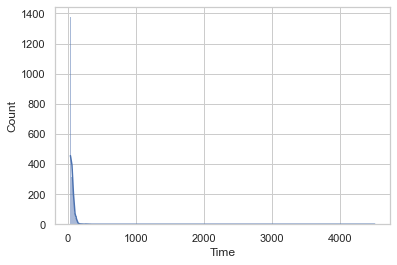

In [217]:
import seaborn as sns
sns.histplot(data=fso, x='Time', kde=True)

In [218]:
fso['Time'].mean()

61.83722620306561

In [222]:
m= fso['Time']
Q1 = m.quantile(0.25)
Q3 = m.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
out_liers2= m [(m < (Q1 - 1.5 * IQR)) |(m > (Q3 + 1.5 * IQR))]
rows = out_liers2.index
l=m.drop(rows).copy()

30.397777777777776


In [225]:
l.mean()

56.614667759729535

<AxesSubplot:xlabel='Time', ylabel='Count'>

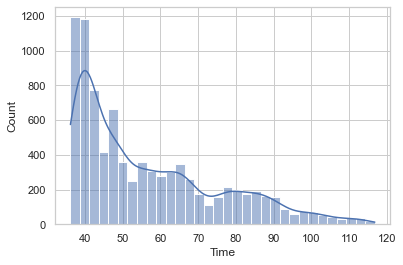

In [223]:
import seaborn as sns
sns.histplot(data=fso, x=l, kde=True)

In [ ]:
## We can say looking at the results below what we are saying as an outlier might be a specific product which may
## not have a frequent sales but its approval takes time as the outliers below show that 

In [235]:
b=fso.loc[out_liers2.index]

In [236]:
b

,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On,between_order_approval,Time
15,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,5 days 04:27:50,124.463889
199,58d4c4747ee059eeeb865b349b41f53a,1755fad7863475346bc6c3773fe055d3,delivered,2018-07-21 12:49:32,2018-07-26 23:31:53,2018-07-24 12:57:00,2018-07-25 23:58:19,2018-07-31,5 days 10:42:21,130.705833
415,56a4ac10a4a8f2ba7693523bb439eede,78438ba6ace7d2cb023dbbc81b083562,delivered,2018-07-22 13:04:47,2018-07-27 23:31:09,2018-07-24 14:03:00,2018-07-28 00:05:39,2018-08-06,5 days 10:26:22,130.439444
483,4df92d82d79c3b52c7138679fa9b07fc,ba0660bf3fffe505ee892e153a2fbd49,delivered,2018-07-24 11:32:11,2018-07-29 23:30:52,2018-07-26 14:46:00,2018-07-27 18:55:57,2018-08-06,5 days 11:58:41,131.978056
1437,d5292f531e571c16fcd72df9fc07336d,2ef9aa87865d1090e352dcc1b116ac23,delivered,2017-04-26 10:48:55,2017-05-01 22:34:22,2017-05-05 10:38:40,2017-05-18 12:20:09,2017-05-19,5 days 11:45:27,131.757500
...,...,...,...,...,...,...,...,...,...,...
98884,67884ec2877808808c25211dce58689b,08ab9916d3e6d664efe2862d1a764d88,delivered,2017-05-07 12:31:08,2017-05-12 21:33:56,2017-05-10 11:43:58,2017-05-16 07:57:33,2017-05-29,5 days 09:02:48,129.046667
99266,76a948cd55bf22799753720d4545dd2d,3f20a07b28aa252d0502fe7f7eb030a9,delivered,2018-01-30 02:41:30,2018-02-04 23:31:46,2018-01-31 18:11:58,2018-03-18 20:08:50,2018-03-02,5 days 20:50:16,140.837778
99290,017cf0b342401318dcaeb25478e13a6f,131227776a8b159a13938a0abfa95c5f,delivered,2017-12-30 02:09:39,2018-01-04 23:17:29,2018-01-09 23:16:11,2018-01-13 17:04:53,2018-02-01,5 days 21:07:50,141.130556
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,4 days 23:16:43,119.278611


<AxesSubplot:xlabel='Time', ylabel='Count'>

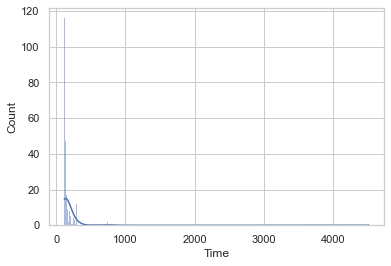

In [237]:
import seaborn as sns
sns.histplot(data=b, x='Time', kde=True)

In [238]:
b['Time'].mean()

176.26230367585626

In [ ]:
### Orders status which are unavailable and who are outliers can be dropped

In [215]:
fso[fso['order_status']=='unavailable']

,order_id,customer_id,order_status,Purchased_At,Approved_At,Delivered_to_Carrier_On,Delivered_to_Customer_On,Estimated_Delivery_On,between_order_approval,Time
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05,2 days 06:37:16,54.621111
4089,1ff6183537eb3a189de77b309ed28ad1,52ac1d5c2063338b5a45f69a14528c9b,unavailable,2018-01-02 17:31:02,2018-01-04 11:57:21,NaT,NaT,2018-01-31,1 days 18:26:19,42.438611
6290,9d4e334ddde795cd4fbee24dc4b68cfe,63531fc8d878fe9a0ac4fd07a4d8a7b1,unavailable,2017-11-27 16:03:51,2017-11-29 16:22:32,NaT,NaT,2017-12-22,2 days 00:18:41,48.311389
8278,0bde826daa0bd10393e958cf5d69dd26,dc9e4413d260758a6e889a0f87aefa7d,unavailable,2017-02-04 10:28:25,2017-02-07 04:10:23,NaT,NaT,2017-03-01,2 days 17:41:58,65.699444
10928,97b22dcad89f4916db427544e655d1b2,a746c825432e5eaf2b8eeece33ca54b7,unavailable,2017-05-15 10:57:13,2017-05-17 04:02:11,NaT,NaT,2017-05-24,1 days 17:04:58,41.082778
...,...,...,...,...,...,...,...,...,...,...
98492,abc371fa4448846ac98855c256ab235f,2ae960d0b2a92913f76520f59d0749b4,unavailable,2017-02-11 19:26:28,2017-02-13 14:05:15,NaT,NaT,2017-03-10,1 days 18:38:47,42.646389
98853,2d57932a94a64e0729ec5b88b4860d0d,18ee349e6fe0fa105ac44232ac1f4d06,unavailable,2018-03-31 19:08:47,2018-04-03 05:27:48,NaT,NaT,2018-04-23,2 days 10:19:01,58.316944
99147,6cf5c427fb11bc5fe8abefa86aa7ba0b,91ac14a1e50bc022eeecf0c2ba37006a,unavailable,2017-10-17 10:53:48,2017-10-19 03:12:43,NaT,NaT,2017-10-27,1 days 16:18:55,40.315278
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15,4 days 23:16:43,119.278611


In [240]:
ordersdf['Time']

0         0.178333
1        30.713889
2         0.276111
3         0.298056
4         1.030556
           ...    
99436     0.000000
99437     0.194167
99438     0.292500
99439     0.131667
99440    14.382778
Name: Time, Length: 99441, dtype: float64

In [253]:
round(ordersdf[['Time']]*60,0).dropna()

,Time
0,11.0
1,1843.0
2,17.0
3,18.0
4,62.0
...,...
99436,0.0
99437,12.0
99438,18.0
99439,8.0


In [295]:
from sklearn.cluster import KMeans
#here you select your columns
X = round(ordersdf[['Time']]*60,0).dropna()
kmeans = KMeans(n_clusters=15, random_state=0).fit(X)
#this will give you the groups back
label=kmeans.predict(X)

In [296]:
X['label']=label
ca=X.copy()

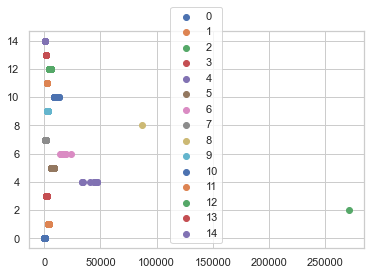

In [297]:
#Getting unique labels
import matplotlib.pyplot as plt
u_labels = np.unique(label)
X=np.array(X) 
#plotting the results:
 
for i in u_labels:
    plt.scatter(X[label == i,0] ,X[label == i , 1] , label = i)
plt.legend()
plt.show()

In [298]:
np.unique(label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [301]:
df=ca.groupby(['label']).Time.agg(["mean","count"]).reset_index().sort_values(by=['mean'])

In [310]:
df

,label,mean,count,mean in hours,Total Percentage
0,0,25.773348,69106,0.429556,0.694945
14,14,570.391704,4026,9.506528,0.040486
7,7,981.119898,5855,16.351998,0.058879
13,13,1448.914435,6498,24.148574,0.065345
3,3,1899.486517,4376,31.658109,0.044006
11,11,2377.050325,3696,39.617505,0.037168
9,9,3062.454231,2021,51.040904,0.020324
1,1,3949.833831,1673,65.830564,0.016824
12,12,5205.700000,1470,86.761667,0.014783
5,5,7298.953642,453,121.649227,0.004555


In [305]:
df['mean in hours']=df['mean']/60

In [311]:
df['Total Percentage']=df['count']/ordersdf.shape[0]*100

In [312]:
df

,label,mean,count,mean in hours,Total Percentage
0,0,25.773348,69106,0.429556,69.494474
14,14,570.391704,4026,9.506528,4.048632
7,7,981.119898,5855,16.351998,5.887913
13,13,1448.914435,6498,24.148574,6.534528
3,3,1899.486517,4376,31.658109,4.400599
11,11,2377.050325,3696,39.617505,3.716777
9,9,3062.454231,2021,51.040904,2.032361
1,1,3949.833831,1673,65.830564,1.682405
12,12,5205.700000,1470,86.761667,1.478263
5,5,7298.953642,453,121.649227,0.455547


1.  From this analysis we can see that the bulk of the orders on average were approved before 10 hours about 70 percent on average took upto 25 minutes to be approved. 
2. Of the remaining 30 percent half of the orders took more than 25 minutes but less than a day
3. The other remaining orders can further be investigated by knowing the product type they maybe outliers but a definite analysis can only be done if we know the product they correpnd to